In [23]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import os
import re

In [28]:
# positive = os.listdir('TrainData/positive/')
# negative = os.listdir('TrainData/negative/')
# with open('Devices/positive.txt', 'w') as f:
#     for item in positive:
#         f.write("%s\n" % item)
# with open('Devices/negative.txt', 'w') as f:
#     for item in negative:
#         f.write("%s\n" % item)

In [32]:
with open('Devices/positive.txt') as f:
    positive = f.read().splitlines()
with open('Devices/negative.txt') as f:
    negative = f.read().splitlines()

In [35]:
len(negative)+len(positive)

191

In [36]:
x = loadmat('Devices/D1_SiXm05/Resdata_06.mat')

In [64]:
numVgDC = x['data'].shape[1]
headers = x['data'].dtype.names
frqs = x['data']['AmpF'][0,0]
bkgIndex = np.abs(x['data']["VgDC"][0,:]).argmin()
x['data']['AmpF'][0,1].shape
amp=np.zeros((frqs.shape[0],numVgDC))
amp_bkg=np.zeros((frqs.shape[0],numVgDC))
phs=np.zeros((frqs.shape[0],numVgDC))
phs_bkg=np.zeros((frqs.shape[0],numVgDC))
for i in range(numVgDC):
    amp[:,i] = x['data']['AmpF'][0,i][:,0]
    amp_bkg[:,i] = x['data']['AmpF'][0,i][:,0]-x['data']['AmpF'][0,bkgIndex][:,0]
    phs[:,i] = x['data']['PhasF'][0,i][:,0]
    phs_bkg[:,i] = x['data']['PhasF'][0,i][:,0]-x['data']['PhasF'][0,bkgIndex][:,0]

In [65]:
amp.shape

(861, 41)

(-0.5, 40.5, -0.5, 860.5)

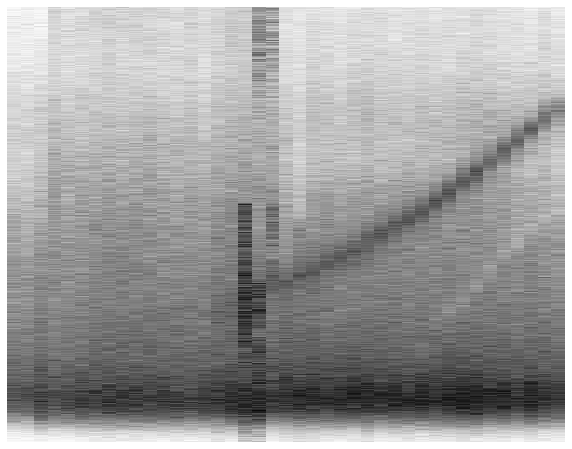

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))
# pos = ax.imshow(amp,aspect='auto',origin='lower',cmap='PuBu_r')
pos = ax.imshow(amp,aspect='auto',origin='lower',cmap='Greys_r')
plt.axis('off')

In [67]:
amp.shape

(861, 41)

In [74]:
I=np.flipud(amp)
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)
img = Image.fromarray(I8)
img.save("file.png")

In [39]:
fig.savefig('phs-bkg.png',bbox_inches='tight',transparent=True, pad_inches=0)

In [40]:
devices = [os.listdir("Devices")[i] for i in range(len(os.listdir("Devices"))) if os.listdir("Devices")[i].startswith('D')]
datasets = {key: os.listdir(os.path.join("Devices",key)) for key in devices}

In [41]:
def plotandsave(dataset):
    for key in dataset.keys():
        for data in dataset[key]:
            if data.endswith('.png'):
                continue
            locn=os.path.join("Devices",os.path.join(key,data))
            #locndd=os.path.join("Devices",key)
            locndd='dispersionPlots'
            print(locn)
            x = loadmat(locn)
            numVgDC = x['data'].shape[1]
            headers = x['data'].dtype.names
            frqs = x['data']['AmpF'][0,0]
            bkgIndex = np.abs(x['data']["VgDC"][0,:]).argmin()
            x['data']['AmpF'][0,1].shape
            amp=np.zeros((frqs.shape[0],numVgDC))
            amp_bkg=np.zeros((frqs.shape[0],numVgDC))
            phs=np.zeros((frqs.shape[0],numVgDC))
            phs_bkg=np.zeros((frqs.shape[0],numVgDC))
            for i in range(numVgDC):
                amp[:,i] = x['data']['AmpF'][0,i][:,0]
                amp_bkg[:,i] = x['data']['AmpF'][0,i][:,0]-x['data']['AmpF'][0,bkgIndex][:,0]
                phs[:,i] = x['data']['PhasF'][0,i][:,0]
                phs_bkg[:,i] = x['data']['PhasF'][0,i][:,0]-x['data']['PhasF'][0,bkgIndex][:,0]
            fig, ax = plt.subplots(figsize=(10, 8))
            pos = ax.imshow(amp,origin='lower',cmap='PuBu_r')
            plt.axis('off')
            fig.savefig(os.path.join(locndd,key+data.split(".")[0]+'amp.png'),
                       bbox_inches='tight',transparent=True, pad_inches=0)
            plt.close("all")
            
            fig, ax = plt.subplots(figsize=(10, 8))
            pos = ax.imshow(amp_bkg,origin='lower',cmap='PuBu_r')
            plt.axis('off')
            fig.savefig(os.path.join(locndd,key+data.split(".")[0]+'amp-bkg.png'),
                       bbox_inches='tight',transparent=True, pad_inches=0)
            plt.close("all")
            
            fig, ax = plt.subplots(figsize=(10, 8))
            pos = ax.imshow(phs,origin='lower',cmap='PuBu_r')
            plt.axis('off')
            fig.savefig(os.path.join(locndd,key+data.split(".")[0]+'phs.png'),
                       bbox_inches='tight',transparent=True, pad_inches=0)
            plt.close("all")
            
            fig, ax = plt.subplots(figsize=(10, 8))
            pos = ax.imshow(phs_bkg,origin='lower',cmap='PuBu_r')
            plt.axis('off')
            #fig.savefig(os.path.join(locndd,data.split(".")[0]+'phs-bkg.png'))
            fig.savefig(os.path.join(locndd,key+data.split(".")[0]+'phs-bkg.png'),
                       bbox_inches='tight',transparent=True, pad_inches=0)
            plt.close("all")
            

In [42]:
x['data'].dtype

dtype([('VgDC', 'O'), ('VgAC', 'O'), ('VsdAC', 'O'), ('FreqF', 'O'), ('AmpF', 'O'), ('PhasF', 'O')])

In [43]:
plotandsave(datasets)

Devices/D3_Drgn05_D5/Resdata_05.mat
Devices/D3_Drgn05_D5/Resdata_03.mat
Devices/D3_Drgn05_D5/Resdata_04.mat
Devices/D3_Drgn05_D5/Resdata_01.mat
Devices/D3_Drgn05_D5/Resdata_02.mat
Devices/D1_SiXm05/Resdata_08.mat
Devices/D1_SiXm05/Resdata_06.mat
Devices/D1_SiXm05/Resdata_05.mat
Devices/D1_SiXm05/Resdata_03.mat
Devices/D1_SiXm05/Resdata_04.mat
Devices/D1_SiXm05/Resdata_01.mat
Devices/D1_SiXm05/Resdata_09.mat
Devices/D1_SiXm05/Resdata_07.mat
Devices/D1_SiXm05/Resdata_02.mat
Devices/D2_Drgn02_D1/Resdata_06.mat
Devices/D2_Drgn02_D1/Resdata_05.mat
Devices/D2_Drgn02_D1/Resdata_03.mat
Devices/D2_Drgn02_D1/Resdata_04.mat
Devices/D2_Drgn02_D1/Resdata_01.mat
Devices/D2_Drgn02_D1/Resdata_07.mat
Devices/D2_Drgn02_D1/Resdata_02.mat
Devices/D5_Drgn03_D1/Resdata_05.mat
Devices/D5_Drgn03_D1/Resdata_03.mat
Devices/D5_Drgn03_D1/Resdata_04.mat
Devices/D5_Drgn03_D1/Resdata_01.mat
Devices/D5_Drgn03_D1/Resdata_02.mat
Devices/D4_Drgn05_D8/Resdata_08.mat
Devices/D4_Drgn05_D8/Resdata_06.mat
Devices/D4_Drgn05_D

In [44]:
import shutil

In [48]:
for f in positive:
    source = 'dispersionPlots/'+f
    destination = 'TrainData/positive/'+f
    shutil.move(source,destination)

In [49]:
for f in negative:
    source = 'dispersionPlots/'+f
    destination = 'TrainData/negative/'+f
    shutil.move(source,destination)

# Saving Array as grayscale

In [58]:
from PIL import Image

In [56]:
def saveArrayAsImage(dataset):
    for key in dataset.keys():
        for data in dataset[key]:
            if data.endswith('.png'):
                continue
            locn=os.path.join("Devices",os.path.join(key,data))
            #locndd=os.path.join("Devices",key)
            locndd='dispersionPlotsGS'
            print(locn)
            x = loadmat(locn)
            numVgDC = x['data'].shape[1]
            headers = x['data'].dtype.names
            frqs = x['data']['AmpF'][0,0]
            bkgIndex = np.abs(x['data']["VgDC"][0,:]).argmin()
            x['data']['AmpF'][0,1].shape
            amp=np.zeros((frqs.shape[0],numVgDC))
            amp_bkg=np.zeros((frqs.shape[0],numVgDC))
            phs=np.zeros((frqs.shape[0],numVgDC))
            phs_bkg=np.zeros((frqs.shape[0],numVgDC))
            for i in range(numVgDC):
                amp[:,i] = x['data']['AmpF'][0,i][:,0]
                amp_bkg[:,i] = x['data']['AmpF'][0,i][:,0]-x['data']['AmpF'][0,bkgIndex][:,0]
                phs[:,i] = x['data']['PhasF'][0,i][:,0]
                phs_bkg[:,i] = x['data']['PhasF'][0,i][:,0]-x['data']['PhasF'][0,bkgIndex][:,0]
            
            plt.imsave(os.path.join(locndd,key+data.split(".")[0]+'amp.png'),
                       amp,origin='lower')
            plt.imsave(os.path.join(locndd,key+data.split(".")[0]+'amp-bkg.png'),
                       amp_bkg,origin='lower')
            plt.imsave(os.path.join(locndd,key+data.split(".")[0]+'phs.png'),
                       phs,origin='lower')
            plt.imsave(os.path.join(locndd,key+data.split(".")[0]+'phs-bkg.png'),
                       phs_bkg,origin='lower')
            

In [57]:
saveArrayAsImage(datasets)
for f in positive:
    source = 'dispersionPlotsGS/'+f
    destination = 'TrainDataGS/positive/'+f
    shutil.move(source,destination)
for f in negative:
    source = 'dispersionPlotsGS/'+f
    destination = 'TrainDataGS/negative/'+f
    shutil.move(source,destination)

Devices/D3_Drgn05_D5/Resdata_05.mat
Devices/D3_Drgn05_D5/Resdata_03.mat
Devices/D3_Drgn05_D5/Resdata_04.mat
Devices/D3_Drgn05_D5/Resdata_01.mat
Devices/D3_Drgn05_D5/Resdata_02.mat
Devices/D1_SiXm05/Resdata_08.mat
Devices/D1_SiXm05/Resdata_06.mat
Devices/D1_SiXm05/Resdata_05.mat
Devices/D1_SiXm05/Resdata_03.mat
Devices/D1_SiXm05/Resdata_04.mat
Devices/D1_SiXm05/Resdata_01.mat
Devices/D1_SiXm05/Resdata_09.mat
Devices/D1_SiXm05/Resdata_07.mat
Devices/D1_SiXm05/Resdata_02.mat
Devices/D2_Drgn02_D1/Resdata_06.mat
Devices/D2_Drgn02_D1/Resdata_05.mat
Devices/D2_Drgn02_D1/Resdata_03.mat
Devices/D2_Drgn02_D1/Resdata_04.mat
Devices/D2_Drgn02_D1/Resdata_01.mat
Devices/D2_Drgn02_D1/Resdata_07.mat
Devices/D2_Drgn02_D1/Resdata_02.mat
Devices/D5_Drgn03_D1/Resdata_05.mat
Devices/D5_Drgn03_D1/Resdata_03.mat
Devices/D5_Drgn03_D1/Resdata_04.mat
Devices/D5_Drgn03_D1/Resdata_01.mat
Devices/D5_Drgn03_D1/Resdata_02.mat
Devices/D4_Drgn05_D8/Resdata_08.mat
Devices/D4_Drgn05_D8/Resdata_06.mat
Devices/D4_Drgn05_D

FileNotFoundError: [Errno 2] No such file or directory: 'TrainDataGS/positive/D3_Drgn05_D5Resdata_04amp.png'

In [5]:
from scipy.io import loadmat
import numpy as np
locn = "Devices/D7_Drgn04_D7/Resdata_05.mat"
x = loadmat(locn)

In [2]:
type(x)

dict

In [3]:
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Mar 12 14:01:11 2020',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[-10]], dtype=int16), array([[158.49]]), array([[15.85]]), array([], shape=(1, 0), dtype=float64), array([[1.13324e-09],
        [1.12710e-09],
        [1.12778e-09],
        [1.13051e-09],
        [1.12846e-09],
        [1.12573e-09],
        [1.13665e-09],
        [1.14688e-09],
        [1.14370e-09],
        [1.14438e-09],
        [1.14256e-09],
        [1.14915e-09],
        [1.15052e-09],
        [1.15643e-09],
        [1.15075e-09],
        [1.14847e-09],
        [1.15234e-09],
        [1.16302e-09],
        [1.15802e-09],
        [1.16439e-09],
        [1.16211e-09],
        [1.16825e-09],
        [1.17053e-09],
        [1.18144e-09],
        [1.17394e-09],
        [1.18190e-09],
        [1.18280e-09],
        [1.19395e-09],
        [1.17735e-09],
        [1.17758e-09],
        [1.20213e-09],
        [1.19417e-09],
  

In [37]:
numVgDC = x['data'].shape[1]
headers = x['data'].dtype.names
frqs = x['data']['AmpF'][0,0]
bkgIndex = np.abs(x['data']["VgDC"][0,:]).argmin()
x['data']['AmpF'][0,1].shape
amp=np.zeros((frqs.shape[0],numVgDC))
amp_bkg=np.zeros((frqs.shape[0],numVgDC))
phs=np.zeros((frqs.shape[0],numVgDC))
phs_bkg=np.zeros((frqs.shape[0],numVgDC))
for i in range(numVgDC):
    amp[:,i] = x['data']['AmpF'][0,i][:,0]
    amp_bkg[:,i] = x['data']['AmpF'][0,i][:,0]-x['data']['AmpF'][0,bkgIndex][:,0]
    phs[:,i] = x['data']['PhasF'][0,i][:,0]
    phs_bkg[:,i] = x['data']['PhasF'][0,i][:,0]-x['data']['PhasF'][0,bkgIndex][:,0]

In [13]:
amp.shape,frqs.shape,numVgDC

((101, 81), (101, 1), 81)

In [8]:
import pandas as pd

In [38]:
colNames = np.arange(-10,10.1,0.25)
rowNames = frqs
df = pd.DataFrame(phs,columns=colNames)

In [39]:
df_sub = pd.DataFrame(phs_bkg,columns=colNames)

In [40]:
df_sub.head()

,-10.00,-9.75,-9.50,-9.25,-9.00,-8.75,-8.50,-8.25,-8.00,-7.75,...,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00
0,-1.242,-1.314,-1.272,-1.158,-1.230,-1.242,-1.128,-1.038,-0.990,-1.032,...,0.996,1.308,1.350,1.146,1.224,1.146,1.098,1.608,1.272,1.542
1,-0.876,-1.026,-1.044,-1.128,-0.936,-0.894,-0.738,-0.756,-0.654,-0.648,...,1.236,1.662,1.272,1.314,1.380,1.464,1.518,1.836,1.374,1.764
2,-1.248,-1.188,-1.212,-1.164,-1.164,-1.032,-0.924,-0.978,-1.026,-1.008,...,1.242,1.368,1.278,1.236,1.176,1.332,1.284,1.320,1.182,1.386
3,-1.194,-1.248,-1.272,-1.260,-1.116,-1.044,-1.044,-1.050,-0.960,-1.068,...,0.870,1.044,1.128,1.014,1.080,1.158,1.272,1.560,1.368,1.428
4,-1.122,-1.176,-1.104,-0.924,-0.966,-0.810,-0.870,-0.726,-0.906,-0.792,...,1.170,1.266,1.392,1.410,1.242,1.428,1.512,1.686,1.212,1.770


In [41]:
df.to_csv("/mnt/5a576321-1b84-46e6-ba92-46de6b117d92/GitHub/DDS/phase.tsv",sep="\t")

In [42]:
df_sub.to_csv("/mnt/5a576321-1b84-46e6-ba92-46de6b117d92/GitHub/DDS/phase_bkg.tsv",sep="\t")